# Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   id                 4803 non-null   int64  
 2   original_language  4803 non-null   object 
 3   original_title     4803 non-null   object 
 4   popularity         4803 non-null   float64
 5   release_date       4802 non-null   object 
 6   revenue            4803 non-null   int64  
 7   runtime            4801 non-null   float64
 8   status             4803 non-null   object 
 9   title              4803 non-null   object 
 10  vote_average       4803 non-null   float64
 11  vote_count         4803 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 450.4+ KB


# Categorical Data

In [4]:
# count status
df[["original_language", "status"]].groupby(["status"]).count()

,original_language
status,
Post Production,3
Released,4795
Rumored,5


In [5]:
# count original_language
df[["original_language", "status"]].groupby(["original_language"]).count()

,status
original_language,
af,1
ar,2
cn,12
cs,2
da,7
de,27
el,1
en,4505
es,32


In [6]:
# find release_month
import datetime
df["release_month"] = pd.DatetimeIndex(df["release_date"]).month
df["release_month"] = df["release_month"].astype(str)

In [7]:
df.dtypes

budget                 int64
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
revenue                int64
runtime              float64
status                object
title                 object
vote_average         float64
vote_count             int64
release_month         object
dtype: object

In [8]:
# count release_month
df[["release_month","original_language"]].groupby(["release_month"]).count()

,original_language
release_month,
1.0,382
10.0,474
11.0,326
12.0,456
2.0,326
3.0,372
4.0,350
5.0,363
6.0,389


In [9]:
df.dropna(subset = ["release_month"], inplace=True)

# Numerical Data

In [10]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [11]:
num_col = ["budget","popularity","revenue","runtime","vote_average","vote_count"]
k = len(num_col)

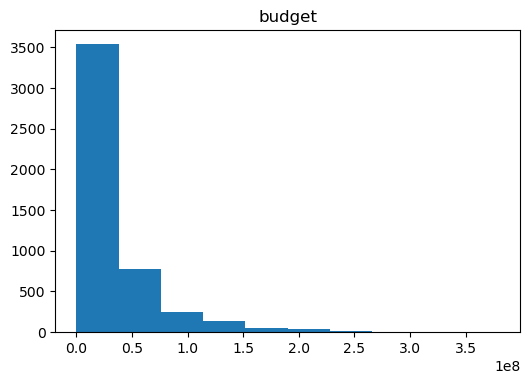

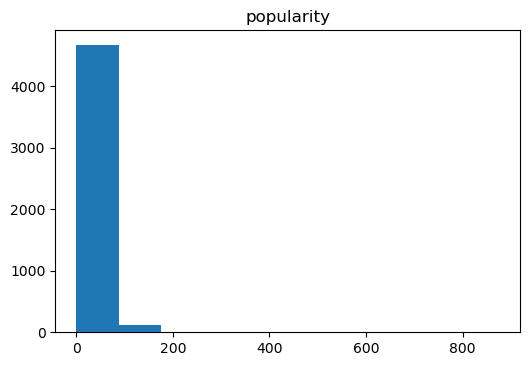

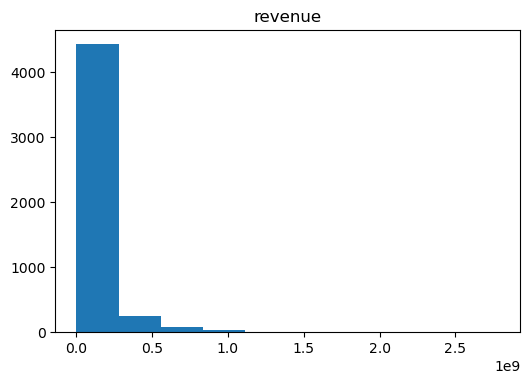

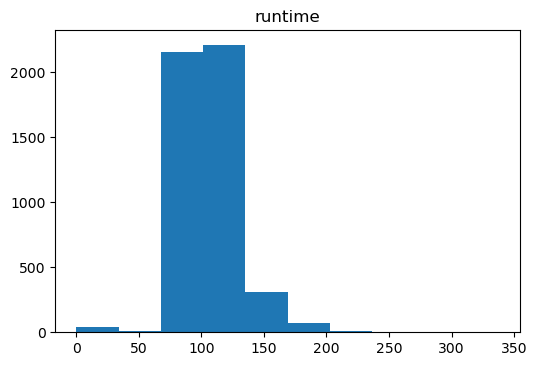

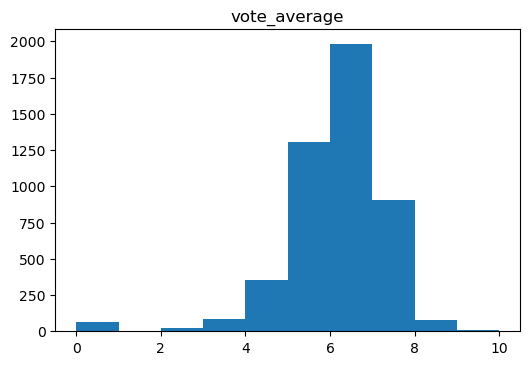

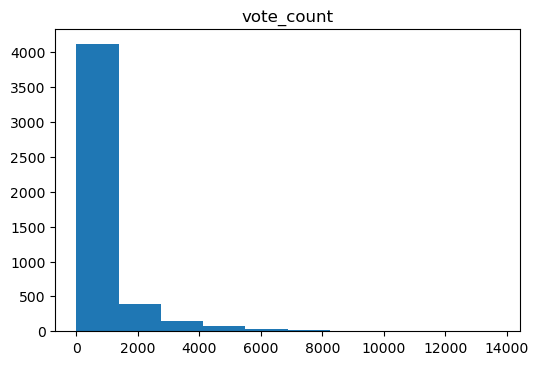

In [12]:
for i in num_col:
    plt.figure(dpi=100)
    plt.hist(df[i])
    plt.title(i)

In [13]:
# remove outliner
df = df[df["revenue"] >= 10000]
df = df[df["budget"] >= 1000000]
df = df[df["vote_count"] >= 50]

In [14]:
df[num_col].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,2.877000e+03,2877.000000,2.877000e+03,2877.000000,2877.000000,2877.000000
mean,4.451313e+07,31.774365,1.346497e+08,111.524157,6.344074,1081.734793
std,4.531945e+07,37.227180,1.929105e+08,20.706754,0.827377,1461.114703
min,1.000000e+06,0.748565,1.747200e+04,63.000000,3.000000,50.000000
25%,1.400000e+07,13.143045,2.492224e+07,97.000000,5.800000,240.000000
50%,3.000000e+07,22.977983,6.834988e+07,108.000000,6.400000,543.000000
75%,6.000000e+07,39.873791,1.603881e+08,122.000000,6.900000,1270.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


# Select feature

In [15]:
import seaborn as sn

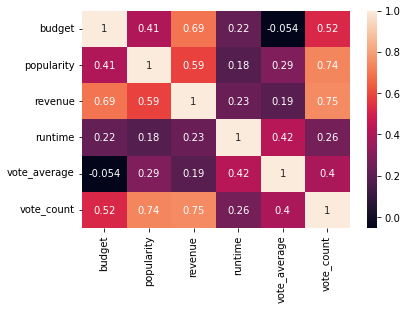

In [16]:
# correlation matrix for among numerical variable 
corrMatrix = df[num_col].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

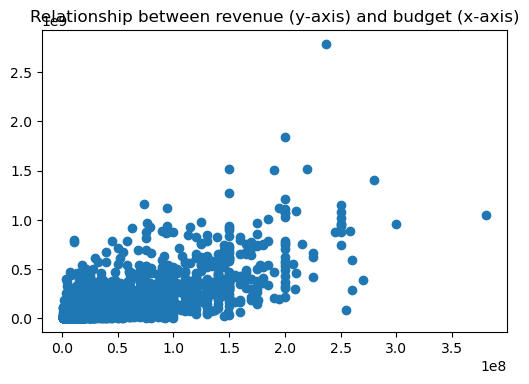

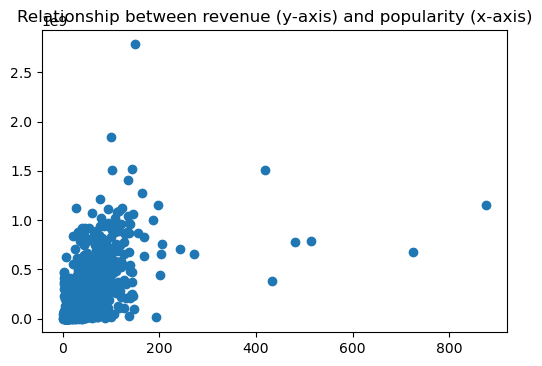

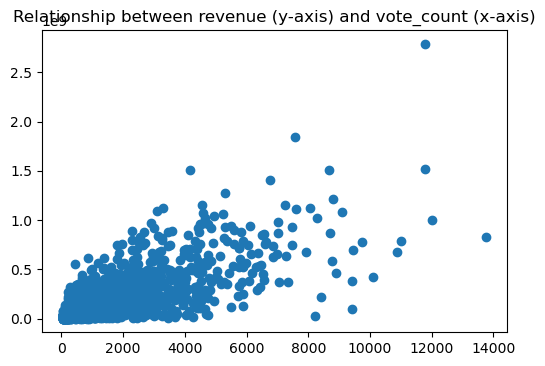

In [17]:
selected_numcol = ["budget", "popularity", "vote_count"]
target_col = "revenue"

for i in selected_numcol:
    plt.figure(dpi=100)
    plt.title(label=f"Relationship between {target_col} (y-axis) and {i} (x-axis)")
    plt.scatter(df[i], df[target_col])

# Preprocess

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
selected_catecol = "release_month"
selected_numcol = ["budget", "popularity", "vote_count"]

In [20]:
#Dummy Variable Encoding
dummy_data = pd.get_dummies(df[selected_catecol]).to_numpy()

# StandardScaler
scaler = StandardScaler().fit(df[selected_numcol])
scaled_data = scaler.transform(df[selected_numcol])

In [21]:
feature_data = pd.DataFrame()
feature_data[selected_numcol] = scaled_data
feature_data[df["release_month"].unique()] = dummy_data
target_data = df["revenue"].to_numpy()

In [22]:
# split data
x_train, x_test, y_train, y_test = train_test_split(feature_data, target_data,
                                                    test_size=0.2, 
                                                    random_state=0)

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
fitted_lr_model = lr_model.fit(x_train, y_train)

In [41]:
coefficient_list = fitted_lr_model.coef_
for idx, val in enumerate(list(x_train)):
  print(f"Coefficient ({val}): {coefficient_list[idx]}")

Coefficient (budget): 79279359.14425935
Coefficient (popularity): 11760608.158545032
Coefficient (vote_count): 91819470.45236482
Coefficient (12.0): -14137419.847577412
Coefficient (5.0): -17302048.910656102
Coefficient (10.0): 20382243.887131188
Coefficient (7.0): 17535665.249177676
Coefficient (3.0): -12623937.73969978
Coefficient (11.0): -15013057.552137768
Coefficient (4.0): 4081427.335190223
Coefficient (6.0): 13132993.648969386
Coefficient (2.0): 36777147.221303396
Coefficient (8.0): -7276545.752300624
Coefficient (9.0): -11713825.283839643
Coefficient (1.0): -13842642.255560497


# Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
fitted_tree_model = tree_model.fit(x_train, y_train)

# Support vector Machines

In [31]:
from sklearn.svm import SVR, LinearSVR
svr_model = SVR()
fitted_svr_model = svr_model.fit(x_train, y_train)

# Evaulation

In [65]:
def evaluate(model):
    # r square
    r2 = model.score(x_test, y_test)  
    print(f"R-Square: {r2}")
    
    # check prediction error
    predicted_y = model.predict(x_test)
    print(f'Mean Absolute Error: {mean_absolute_error(predicted_y, y_test)}' )
    print(f'Mean Square Error:: {mean_squared_error(predicted_y, y_test)}' )
    print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(predicted_y, y_test))}')
    print(f'Mean Absolute Percentage Error: {mape(predicted_y, y_test)}' + "%")

In [66]:
model_lst = [lr_model, tree_model, svr_model]

for model in model_lst:
    print(f'model: {model}')
    evaluate(model)
    print("\n")

model: LinearRegression()
R-Square: 0.6809407437963839
Mean Absolute Error: 60149251.820269756
Mean Square Error:: 8825763790727973.0
Root Mean Square Error: 93945536.30017753
Mean Absolute Percentage Error: 196.9993546680422%


model: DecisionTreeRegressor()
R-Square: 0.3764972816601775
Mean Absolute Error: 78648539.55208333
Mean Square Error:: 1.7247227930075332e+16
Root Mean Square Error: 131328701.85178612
Mean Absolute Percentage Error: 891.2598520054596%


model: SVR()
R-Square: -0.1351069241102496
Mean Absolute Error: 101065519.37566799
Mean Square Error:: 3.139913791757691e+16
Root Mean Square Error: 177198018.94371423
Mean Absolute Percentage Error: 149.06348784488245%




In [53]:
def check_residual(model):
    # train set 
    predicted_y_train = model.predict(x_train)
    residual_train = (predicted_y_train - y_train)

    plt.figure(dpi=100)
    plt.scatter(predicted_y_train, residual_train, s=20)
    plt.title(f'{model}Train set residual errors')


<Figure size 600x400 with 0 Axes>

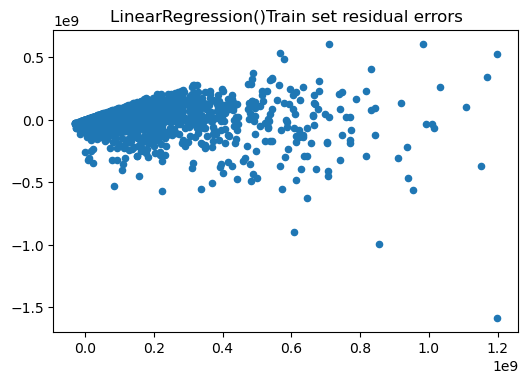

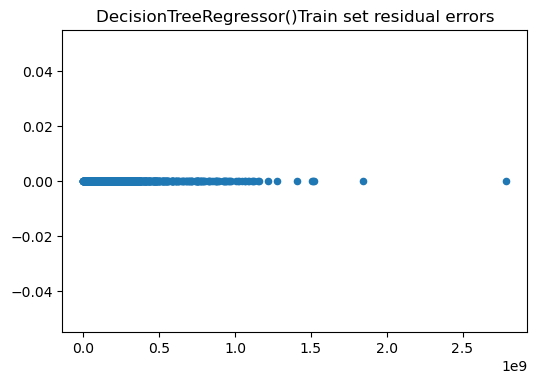

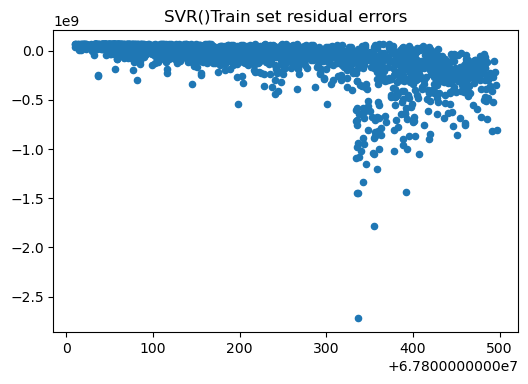

In [55]:
model_lst = [lr_model, tree_model, svr_model]

plt.figure(dpi=100)
for model in model_lst:
    check_residual(model)

The decision Tree Regression is overfit.